# Debt to GDP Calculations
---

#### Import Libraries 

In [1]:
import os
import csv

import pandas as pd 
import numpy as np 
import datetime as dt 

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter, PercentFormatter

#### Import [debtToGDP.py](debtToGDP.py) 

In [2]:
import debtToGDP as dtg
debtion = dtg.DEBT(dtg.measurements)

#### Set Y-Ticks 

In [3]:
# Set YTicks to Trillions from Millions
def Tmillions(x, pos):
    return '%1.1fT' % (x * 1e-6)

def Bmillions(x, pos): 
    return '%1.1fB' % (x* 1e-6)

formatterTMilly = FuncFormatter(Tmillions)
formatterBMilly = FuncFormatter(Bmillions)

## Debt By Category:
---

In [4]:
# Total Household and Non-Profit Debt 
house_debt = debtion.total_household_nonprofit_debt()

# Total US Government Debt 
gov_debt = debtion.total_gov_debt()

# Total US Business Debt 
biz_debt = debtion.total_business_debt()

### Plot

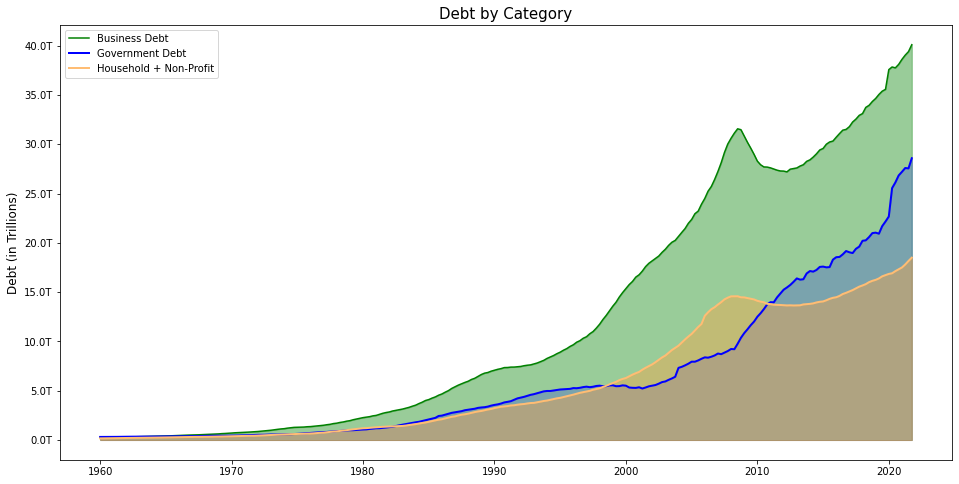

In [5]:
# Plotting 
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(biz_debt['debt_sum'], label='Business Debt', color='g')
ax.fill_between(biz_debt.index, biz_debt.debt_sum, color='g', alpha=0.4)
ax.plot(gov_debt['debt_sum'], label='Government Debt', color='b', linewidth=2)
ax.fill_between(gov_debt.index, gov_debt.debt_sum, color='b', alpha=0.2)
ax.plot(house_debt['debt_sum'], label='Household + Non-Profit', color='#ffbd74', linewidth=2)
ax.fill_between(house_debt.index, house_debt.debt_sum, color='#ffa33f', alpha=0.4)

ax.set_title('Debt by Category', fontsize=15)
ax.set_ylabel('Debt (in Trillions)', fontsize=12)
ax.yaxis.set_major_formatter(formatterTMilly)
ax.legend(loc=2)

## Debt to GDP
---

In [6]:
# US Debt to GDP
d_gdp = debtion.usDebt_to_gdp()

# YOY Debt to GDP Change
yoy = debtion.yoy_debt_to_gdp_change()

### Plot

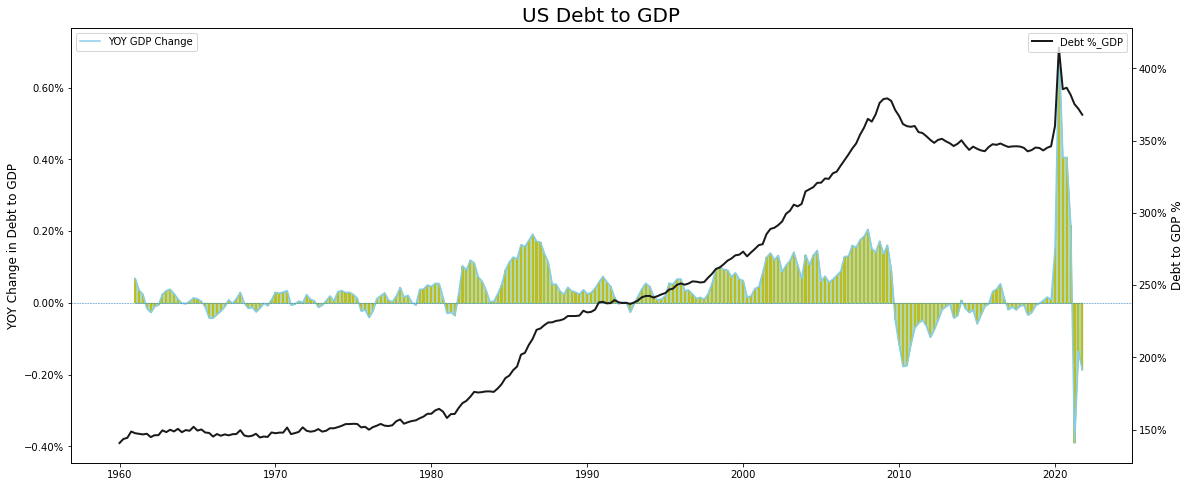

In [13]:
plotter = dtg.DEBT_PLOTTING(dtg.measurements)
plotter.us_gdp_v_debt()

Text(0.5, 1.0, 'US Debt to GDP')

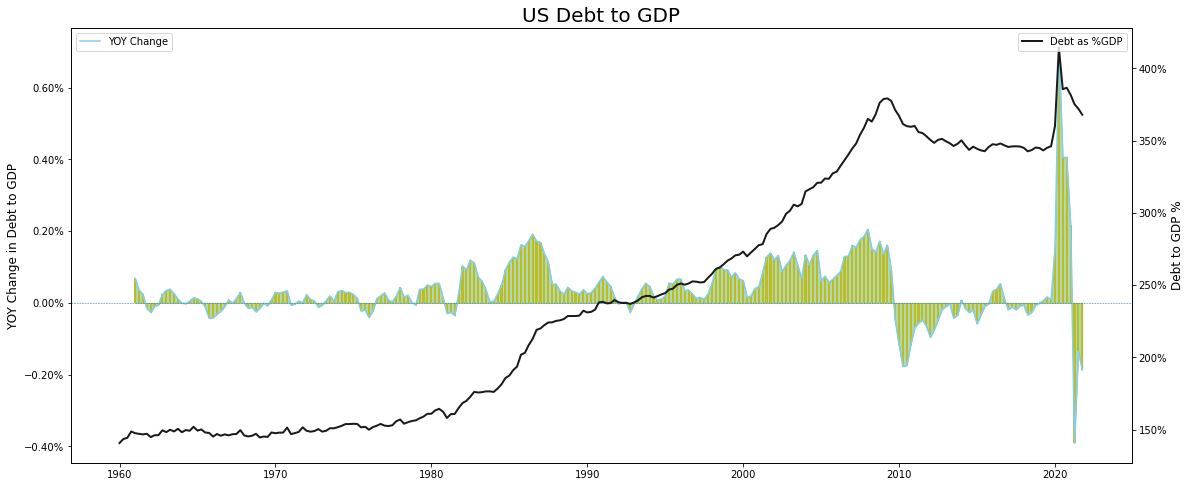

In [7]:
# Plotting 
fig, ax2 = plt.subplots(figsize=(19,8))

ax2.plot(yoy.index, yoy['Change'], label='YOY Change', color='skyblue')
ax2.bar(yoy.index, yoy['Change'], width=50, color='tab:olive')
ax2.fill_between(yoy.index,0,yoy.Change, color='g', alpha=0.3)
ax2.axhline(y=0, linewidth=.5, linestyle='--')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel('YOY Change in Debt to GDP', fontsize=12)
ax2.legend(loc=2)

ax = ax2.twinx()
ax.plot(d_gdp['Debt_as_%_GDP'], label='Debt as %GDP',color='0.1', linewidth=2)
ax.set_ylabel('Debt to GDP %', fontsize=12)
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.legend(loc=1)

ax.set_title('US Debt to GDP', fontsize=20)

## GDP VS. Debt 
---

In [8]:
# US Debt to GDP
d_gdp = debtion.usDebt_to_gdp()

# Category Sum  
category_sum = pd.concat([debtion.total_business_debt(), debtion.total_gov_debt(), debtion.total_household_nonprofit_debt()], axis=1, join='outer')
category_sum = category_sum.drop(['debt_sum'], axis=1)
category_sum['big_sum'] = category_sum.sum(axis=1)
#category_sum

### Plot

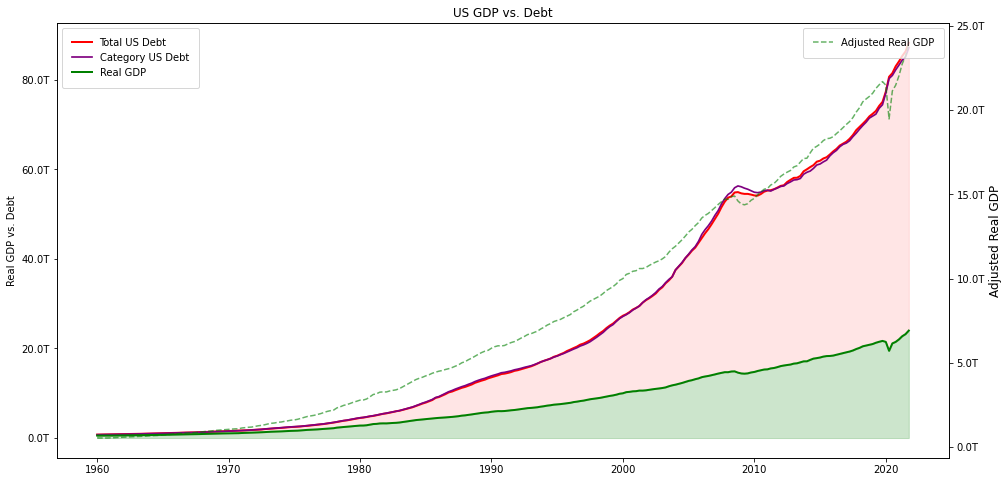

In [9]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(d_gdp.Total_Debt, label='Total US Debt', color='red', linewidth=2)
ax.plot(category_sum.big_sum, label='Category US Debt', color='purple', linewidth=1.7)
ax.plot(d_gdp.GDP, label='Real GDP', color='green', linewidth=2)
ax.fill_between(d_gdp.index,d_gdp.GDP, d_gdp.Total_Debt, color='red', alpha=0.1)
ax.fill_between(d_gdp.index, d_gdp.GDP, color='green', alpha=0.2)
ax.yaxis.set_major_formatter(formatterTMilly)
ax.set_ylabel('Real GDP vs. Debt')
ax.set_title('US GDP vs. Debt')
ax.legend(loc=2, borderpad=1,fontsize=10)

ax2 = ax.twinx()
ax2.plot(d_gdp.GDP, label='Adjusted Real GDP', color='green', linewidth=1.5, alpha=0.6, linestyle='--')
ax2.yaxis.set_major_formatter(formatterTMilly)
ax2.set_ylabel('Adjusted Real GDP', fontsize=12)
ax2.legend(loc=1,borderpad=1, fontsize=10)